`CMPE-255. Fall 2023` </br>
**Student Name**: Bhavya Hegde </br>
**Student ID**: 016656029 </br>

# Beating the Market
After taking a Data Mining class, Suzie Happybetting decided that she could use Association Rules to beat the stock market. Armed with the knowledge of data cleaning, data sampling, and association analysis, she devised an algorithm to pick the right companies to invest in. Her strategy will be to identify groups of companies that increase value over periods of 6 months, calculate the confidence that this groups grow together, then bet in the companies in a high confidence rule before their stock goes up. For instance, if she finds out that `{ AMD, APPL, NVDA }` have high support, and `{ AMD, APPL } > { NVDA }` has high confidence, she can invest in NVDA as soon as the stock for AMD, APPL go up, because she'll expect the stock from NVDA will quickly follow.

In [51]:
# Libraries - ONLY THIS LIBRARIES ARE ALLOWED FOR THE HOMEWORK
import random
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
import progressbar
# Do not add any other library

In [52]:
# Stock tickers. Small is best for debuging the code. Medium or Large should be used for final solution.
TICKERS_SMALL = ['AMD', 'AAPL', 'MA', 'MRK', 'NVDA', 'PPIH', 'GLO', 'AGM']
TICKERS_MEDIUM = TICKERS_SMALL + ['HGBL', 'ETO', 'INFY', 'SNBR', 'CENTA', 'CWT', 'TRTN', 'SKX',
 'FSS', 'TPR', 'ONB', 'SBH', 'MDT', 'SENEB', 'HSBC', 'STN', 'JOB', 'TYG', 'TENX', 'TRN', 'CTHR']
TICKERS_LARGE  = TICKERS_MEDIUM + ['NSIT', 'LCTX', 'CIB', 'TILE', 'SIGI', 'WINA', 'OPY', 'ARE', 'LGND', 'ITI',
 'ENSV', 'PGC', 'SYK', 'MUA', 'WCC', 'AZN', 'GCV', 'NR',
 'DD', 'HWBK', 'HIMX', 'GPC', 'ORCL', 'GREE', 'TY', 'GBR', 'TGI', 'RCG', 'AMWD', 'ELP', 'MGRC', 'EGLE', 'CYD', 'IART',
 'DINO', 'ENSG', 'SPOK', 'YORW', 'AWF', 'CMTL', 'XOM', 'OTTR', 'BZH', 'AXDX', 'ANIP', 'EZPW', 'AEM', 'NZF', 'BX', 'OI',
 'TAIT', 'TWIN', 'CYTK', 'BOTJ', 'AMZN', 'AEY', 'SATS', 'UAVS', 'TS', 'ORMP', 'KO', 'CVR', 'HOFT', 'NVDA', 'BANC', 'MMC',
 'ERII', 'WWW', 'IMKTA', 'CSX', 'DNP', 'CVGW', 'ESOA', 'BRN', 'HIBB', 'SRT', 'GEG', 'CW', 'UTF', 'GRMN', 'QGEN', 'EYPT', 'HEP', 'APWC', 'EA', 'DYAI', 'ELME', 'SPCB',
 'LII', 'CWST', 'CPLP', 'GDO', 'AVY', 'PZC', 'AXGN', 'SOHU', 'CNOB', 'BELFA', 'ETB', 'BSBR', 'IAF', 'CASH', 'CTO', 'ITW', 'DYNT', 'AE', 'EGP', 'PAYX', 'JBL', 'CAMP',
 'EBR', 'KOPN', 'NX', 'SEE', 'LOW', 'ATRO', 'NKX', 'ADUS', 'CNXN', 'BMI', 'CRK', 'BSET', 'CRS', 'CPRX', 'OMCL', 'KRNY',
 'AVT', 'MUFG', 'BBWI', 'REI', 'TARO', 'MFD', 'VLO', 'CFR', 'PBR', 'SFE', 'MTRX', 'AREN', 'CVU', 'SR', 'KVHI', 'LFMD',
 'DJCO', 'CXE', 'EME', 'SITC', 'GLDD', 'MT', 'KELYB', 'KSM', 'NHC', 'PHM', 'MCI', 'HLX', 'ALX', 'CLM', 'ECL', 'LMAT',
 'NTAP', 'PMN', 'LWLG', 'MASI', 'PEB', 'BKNG', 'K', 'PGP', 'FGH', 'SEM', 'AAP', 'PRGS', 'CNTY', 'RNR', 'MHF', 'TNC',
 'FSFG', 'MODG', 'CREX', 'ESGR', 'CIK', 'PAC', 'HSII', 'SWK', 'BRT', 'PTRS', 'MMT', 'IGT', 'RAND', 'HBAN', 'WSFS',
 'OPI', 'GLRE', 'FLIC', 'HUM', 'NEOG', 'BNS', 'DSWL', 'NEO', 'UMH', 'GCO', 'ASML', 'VERU', 'OTRK', 'HRI', 'ATO', 'CODA',
 'EPR', 'SLGN', 'ELLO', 'NRG', 'TXN', 'CIM', 'BKD', 'PEBO', 'C', 'MGYR', 'GNW', 'JNPR' ]

TICKERS_ALL = ['AMD', 'AAPL', 'MA', 'MRK', 'NVDA', 'PPIH', 'GLO', 'AGM', 'HGBL', 'ETO', 'INFY', 'SNBR', 'CENTA', 'CWT', 'DBD',
 'CSII', 'TRTN', 'SKX', 'FSS', 'TPR', 'ONB', 'SBH', 'MDT', 'SENEB', 'HSBC', 'STN', 'JOB', 'TYG', 'TENX', 'TRN', 'CTHR',
 'NSIT', 'LCTX', 'CIB', 'TILE', 'SIGI', 'WINA', 'OPY', 'ARE', 'LGND', 'ITI', 'ENSV', 'PGC', 'SYK', 'MUA', 'WCC', 'AZN', 'GCV', 'NR',
 'DD', 'HWBK', 'HIMX', 'GPC', 'ORCL', 'GREE', 'TY', 'GBR', 'TGI', 'RCG', 'AMWD', 'ELP', 'MGRC', 'EGLE', 'CYD', 'IART',
 'DINO', 'ENSG', 'SPOK', 'YORW', 'AWF', 'CMTL', 'XOM', 'OTTR', 'BZH', 'AXDX', 'ANIP', 'EZPW', 'AEM', 'NZF', 'BX', 'OI',
 'TAIT', 'TWIN', 'CYTK', 'BOTJ', 'AMZN', 'AEY', 'SATS', 'UAVS', 'TS', 'ORMP', 'KO', 'CVR', 'HOFT', 'NVDA', 'BANC', 'MMC',
 'ERII', 'WWW', 'IMKTA', 'CSX', 'DNP', 'CVGW', 'ESOA', 'BRN', 'HIBB', 'SRT', 'GEG', 'CW', 'UTF', 'GRMN', 'QGEN', 'EYPT', 'HEP', 'APWC', 'EA', 'DYAI', 'ELME', 'SPCB',
 'LII', 'CWST', 'CPLP', 'GDO', 'AVY', 'PZC', 'AXGN', 'SOHU', 'CNOB', 'BELFA', 'ETB', 'BSBR', 'IAF', 'CASH', 'CTO', 'ITW', 'DYNT', 'AE', 'EGP', 'PAYX', 'JBL', 'CAMP',
 'EBR', 'KOPN', 'NX', 'SEE', 'LOW', 'ATRO', 'NKX', 'ADUS', 'CNXN', 'BMI', 'CRK', 'BSET', 'CRS', 'CPRX', 'OMCL', 'KRNY',
 'AVT', 'MUFG', 'BBWI', 'REI', 'TARO', 'MFD', 'VLO', 'CFR', 'PBR', 'SFE', 'MTRX', 'AREN', 'CVU', 'SR', 'KVHI', 'LFMD',
 'DJCO', 'CXE', 'EME', 'SITC', 'GLDD', 'MT', 'KELYB', 'KSM', 'NHC', 'PHM', 'MCI', 'HLX', 'ALX', 'CLM', 'ECL', 'LMAT',
 'NTAP', 'PMN', 'LWLG', 'MASI', 'PEB', 'BKNG', 'K', 'PGP', 'FGH', 'SEM', 'AAP', 'PRGS', 'CNTY', 'RNR', 'MHF', 'TNC',
 'FSFG', 'MODG', 'CREX', 'ESGR', 'CIK', 'PAC', 'HSII', 'SWK', 'BRT', 'PTRS', 'MMT', 'IGT', 'RAND', 'HBAN', 'WSFS',
 'OPI', 'GLRE', 'FLIC', 'HUM', 'NEOG', 'BNS', 'DSWL', 'NEO', 'UMH', 'GCO', 'ASML', 'VERU', 'OTRK', 'HRI', 'ATO', 'CODA',
 'EPR', 'SLGN', 'ELLO', 'NRG', 'TXN', 'CIM', 'BKD', 'PEBO', 'C', 'MGYR', 'GNW', 'JNPR',
 'NUS', 'BMA', 'IVAC', 'GOOGL', 'THG', 'DBI', 'INTG', 'LH', 'ILMN', 'UMC', 'FTEK', 'CMU', 'HWC', 'CCRD', 'NXDT', 'DG',
 'NEM', 'HFWA', 'PW', 'VCV', 'STBA', 'CUEN', 'ERJ', 'LCI', 'NSYS', 'UVV', 'WF', 'MMLP', 'PRIM', 'HAS', 'SP', 'DHIL',
 'GSAT', 'UPBD', 'NTRS', 'VXRT', 'UONE', 'TOL', 'SAP', 'AAME', 'AXON', 'WST',
 'MCK', 'EXC', 'TAC', 'BAX', 'SRCE', 'FMAO', 'ITCB', 'HQL',
 'EFOI', 'BFIN', 'CNMD', 'PBI', 'CNX', 'MSEX', 'CFBK', 'DNN', 'AMS', 'TOVX', 'CME', 'TEX', 'SOFO', 'WSO', 'LEO', 'RBBN',
 'STAA', 'ADBE', 'BR', 'NNVC', 'NBH', 'ERH', 'BHC', 'IMH', 'RWT', 'EPC', 'HYT', 'UFPI', 'VSAT', 'NXPL', 'MAG', 'FCBC',
 'GLAD', 'CVM', 'WAL', 'LNG', 'UTHR', 'CLX', 'UTL', 'ESS', 'JPS', 'HYB', 'MDRX', 'VGR', 'PHI', 'BLKB', 'KR', 'CMCO',
 'RDNT', 'HIFS', 'CPT', 'SHBI', 'USAU', 'BAP', 'T', 'SMBC', 'TBI', 'MOBQ', 'DB', 'MRTN', 'FORM', 'UTMD', 'PUK', 'ARI',
 'ARAY', 'FL', 'KLIC', 'IOSP', 'PSO', 'TDS', 'CPK', 'SHYF', 'CLFD', 'SAH', 'SENEA', 'PAM', 'NGG', 'ASGN', 'ENX', 'NMZ',
 'DOOR', 'VOXX', 'MCHX', 'FFC', 'NICK']

# Stock data will be downloaded for within the following range of dates
DATA_RANGE_START = '2010-01-01'
DATA_RANGE_END   = '2022-12-31'

# Number of days (entries) to calculate stock trends
DATA_INTERVAL = 120
# Minimum change in trend to consider = 10%
TREND_THRESHOLD = 0.1
# Minimum itemset support to consider = 0.5%
SUPPORT_THRESHOLD = 0.005

In [53]:
def add_noise_to_dataset(dataset):
  '''Add noise to the data in the dataset.
  It modifies data in the 'Close' column.
  It introduces to types of incorrect values:
  1 - Makes the value negative
  2 - Makes the value inconsistent with the provided 'High' and 'Low' range

  Example: Given the following entry:

  Date        Open  High  Low   Close Adj Close Volume
  2010-01-04	9.79	9.90	9.68	9.70	9.70      18748700

  Type 1 will make the 'Close' value negative:
  Date        Open  High  Low   Close Adj Close Volume
  2010-01-04	9.79	9.90	9.68	-9.70	9.70      18748700

  Type 2 will make the 'Close' value inconsistent with 'High' and 'Low',
  for instance,
  Date        Open  High  Low   Close Adj Close Volume
  2010-01-04	9.79	9.90	9.68	9.94	9.70      18748700

  In the example above, the 'Close' value, '9.94' is LARGER THAN the 'High'
  value, which is not correct.
  '''
  # Percentage of errors to insert the data for each ticker
  PERCENT_OF_ERRORS = 0.5
  # Iterate through all tickers
  for ticker in dataset.keys():
    datasize = dataset[ticker].shape[0]
    no_of_errors = int(datasize*PERCENT_OF_ERRORS/100)
    # Iterate through the number of errors to insert
    for idx in range(no_of_errors):
      # Randomly choose the type of error to insert, 1 or 2
      type_of_error = random.randint(1, 2)
      place_of_error = random.randint(0, datasize-1)

      original_value = dataset[ticker].iloc[place_of_error, 3]
      # Insert error of type 1 - Make entry zero
      if type_of_error == 1:
        dataset[ticker].iloc[place_of_error, 3] = -1.0*original_value  # close_value = -1.0  * original_close
      # Insert error of type 2 - Make entry inconsistent
      elif type_of_error == 2:
        if random.randint(0, 1):
          dataset[ticker].iloc[place_of_error, 3] = original_value + 2*(dataset[ticker].iloc[place_of_error, 1]-dataset[ticker].iloc[place_of_error, 2])  #close_value = original_close + 2* (High - Low)
        else:
          dataset[ticker].iloc[place_of_error, 3] = dataset[ticker].iloc[place_of_error, 2]/2     # close_value = low/2

      #print("DBG: Modified ticker", ticker, "at location", place_of_error, ". Original value:", original_value, ". New value:", dataset[ticker].iloc[place_of_error, 3])

  print("Added", no_of_errors, "errors to each ticker in the database")

  return dataset

In [54]:
def get_clean_dataset(tickers, start_date, end_date):
  '''Method to retrieve all the data required for this homework.
  input: list of stock tickers (e.g., ['AAPL', 'META', 'AMD'])
  output: dictionary of pandas dataframes with historical values for each ticker.
          e.g., data['AMD'] = pandas dataframe

  The output dataframe looks as follows:

  Date        Open  High  Low   Close Adj Close Volume
  2010-01-04	9.79	9.90	9.68	9.70	9.70      18748700
  2010-01-05  9.81  9.99  9.23  9.54  9.68      20010100
  ...

  NOTE: The total number of entries is fixed to the number of entries of the
        first ticket read
  '''
  dataset = {}
  no_entries = -1
  for ticker in tickers:
    try:
      ds = yf.download(ticker, start_date, end_date)
      print ("Downloaded data for ticker:", ticker, "with", ds.shape, "entries")
      if no_entries == -1 or ds.shape[0] == no_entries:
        dataset.update({ticker : ds});
        no_entries = ds.shape[0]
      else:
        print("WARN: DISCARDING dataset for ticker", ticker, " with unexpected number of entries!")
    except:
      print("WARN: Unable to download dataset for ticker:", ticker)

  print("Downloaded historical data for", len(dataset), "tickers")
  return dataset


In [55]:
def get_dataset(tickers):
  '''Retrieve a dataset with the provided tickers, and
  insert errors.
  Return a dataset with errors inserted'''
  return add_noise_to_dataset(get_clean_dataset(tickers, DATA_RANGE_START, DATA_RANGE_END))

In [56]:
# Example - Get small dataset
ds = get_dataset(TICKERS_SMALL)

[*********************100%%**********************]  1 of 1 completed
Downloaded data for ticker: AMD with (3272, 6) entries
[*********************100%%**********************]  1 of 1 completed
Downloaded data for ticker: AAPL with (3272, 6) entries
[*********************100%%**********************]  1 of 1 completed
Downloaded data for ticker: MA with (3272, 6) entries
[*********************100%%**********************]  1 of 1 completed
Downloaded data for ticker: MRK with (3272, 6) entries
[*********************100%%**********************]  1 of 1 completed
Downloaded data for ticker: NVDA with (3272, 6) entries
[*********************100%%**********************]  1 of 1 completed
Downloaded data for ticker: PPIH with (3272, 6) entries
[*********************100%%**********************]  1 of 1 completed
Downloaded data for ticker: GLO with (3272, 6) entries
[*********************100%%**********************]  1 of 1 completed
Downloaded data for ticker: AGM with (3272, 6) entries
Downlo

In [57]:
# Example - Display values for first ticker in the dataset
ds['AMD']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,9.790000,9.900000,9.680000,9.700000,9.700000,18748700
2010-01-05,9.710000,9.900000,9.680000,9.710000,9.710000,22145700
2010-01-06,9.680000,9.760000,9.550000,9.570000,9.570000,18643400
2010-01-07,9.510000,9.550000,9.180000,9.470000,9.470000,26806800
2010-01-08,9.370000,9.470000,9.290000,9.430000,9.430000,13752800
...,...,...,...,...,...,...
2022-12-23,63.110001,64.660004,62.720001,64.519997,64.519997,45923000
2022-12-27,63.869999,64.279999,62.970001,63.270000,63.270000,36086000
2022-12-28,62.540001,63.540001,61.959999,62.570000,62.570000,39526500


# 1. Clean Dataset

Create a function, `clean_data(dataset)` that will take the dataset created by function `get_dataset(tickers)` and return a new dataset where all errors are fixed.
The function must be clearly documented. In particular it must include:
- A list of error types it can detect.
- An explanation of what technique is used to fix each error type, and why.


In [58]:
def clean_data(dataset):
    ''' Include explanations here'''
    # To detect error value in close - we check first if the close value is between the high and low for that date.
    # If error is detected  - check if the value is negative - if value found to be negative then we know this was a type-1 error so we multiply it with -1.0 again to make it positive - this fixes the error
    # If error is deteced and close value is positive it is a type 2 error. Based on the add_noise_to_dataset function the type 2 error can make the data inconsistent in 2 ways.
    ## 1st way if the close is less than low then we multiple the close  by 2 to fix the error
    ## 2nd way if the close is greater than high then we fix the close value by close_value - 2(high - low)
    for ticker in dataset.keys():
        datasize = dataset[ticker].shape[0]
        for ind in dataset[ticker].index:
            if (dataset[ticker].loc[ind, 'Close'] < 0.0):
              #print(ind," : Found negative value here")
                dataset[ticker].loc[ind, 'Close'] = -1.0 * dataset[ticker].loc[ind, 'Close']
            elif (dataset[ticker].loc[ind, 'Close'] < dataset[ticker].loc[ind, 'Low']):
              #print(ind, ": Found close < low")
              #print(str(dataset[ticker]['High'][ind]), "",str(dataset[ticker]['Low'][ind]), "",str(dataset[ticker]['Close'][ind]), "", )
                dataset[ticker].loc[ind, 'Close'] = dataset[ticker].loc[ind, 'Close'] * 2
                #print("Close Fixed : ",str(dataset[ticker]['Close'][ind]))
            elif (dataset[ticker].loc[ind, 'Close'] > dataset[ticker].loc[ind, 'High']):
              #print(ind, ": Found close > high")
        #print(str(dataset[ticker]['High'][ind]), "",str(dataset[ticker]['Low'][ind]), "",str(dataset[ticker]['Close'][ind]), "", )
                dataset[ticker].loc[ind, 'Close'] = dataset[ticker].loc[ind, 'Close'] - (2 * (dataset[ticker].loc[ind, 'High'] - dataset[ticker].loc[ind, 'Low']))
                      #print("Close Fixed : ",str(dataset[ticker]['Close'][ind]))
    return dataset

In [59]:
dataset = clean_data(ds)

In [60]:
dataset

{'AMD':                  Open       High        Low      Close  Adj Close    Volume
 Date                                                                       
 2010-01-04   9.790000   9.900000   9.680000   9.700000   9.700000  18748700
 2010-01-05   9.710000   9.900000   9.680000   9.710000   9.710000  22145700
 2010-01-06   9.680000   9.760000   9.550000   9.570000   9.570000  18643400
 2010-01-07   9.510000   9.550000   9.180000   9.470000   9.470000  26806800
 2010-01-08   9.370000   9.470000   9.290000   9.430000   9.430000  13752800
 ...               ...        ...        ...        ...        ...       ...
 2022-12-23  63.110001  64.660004  62.720001  64.519997  64.519997  45923000
 2022-12-27  63.869999  64.279999  62.970001  63.270000  63.270000  36086000
 2022-12-28  62.540001  63.540001  61.959999  62.570000  62.570000  39526500
 2022-12-29  63.639999  65.180000  63.060001  64.820000  64.820000  41428500
 2022-12-30  63.770000  64.820000  63.139999  64.769997  64.769997  3

# 2. Transactions Database

Create a function, `get_transactions(dataset, data_interval, trend_threshold)` that will take the clean dataset from `clean_data(dataset)` and generate a Transactions database that can be used for the analysis described in the deliverables below.


In [61]:
def get_transactions_table(dataset, data_interval, trend_threshold):

    '''
    We check the number of rows for the tickers and then subtract the interval from this length.
    While iterating through this range we calculate for each ticker whether the growth is above the trend threashold. If threshold is crossed we mark 1 for that ticket transaction.
    Otherwise a 0 is marked for that ticker in the transaction.

    This function generates a transactions database based on stock trends.

    Args:
    - dataset (dict): Cleaned dataset containing stock data for various tickers. Each entry is a pandas DataFrame.
    - data_interval (int): Number of days (entries) to calculate stock trends.
    - trend_threshold (float): Minimum change in trend to consider.

    Returns:
    - DataFrame: Transactions database.
    '''

    # List to store transactions
    transactions_list = []

    # Number of tickers
    num_tickers = len(dataset.keys())

    # Iterate over the dataset
    for i in range(len(next(iter(dataset.values()))) - data_interval):
        transaction = []
        for ticker, data in dataset.items():
            # Calculate the trend
            start_price = data.iloc[i]['Close']
            end_price = data.iloc[i + data_interval]['Close']
            trend = (end_price - start_price) / start_price

            # Check if the trend is greater than or equal to the trend_threshold
            if trend >= trend_threshold:
                transaction.append(1)
            else:
                transaction.append(0)

        transactions_list.append(transaction)

    # Convert the transactions list to a DataFrame
    transactions= pd.DataFrame(transactions_list, columns=dataset.keys())
    return transactions


In [62]:
transactions = get_transactions_table(dataset, DATA_INTERVAL, TREND_THRESHOLD)
print("TICKERS:", dataset.keys())
print("TRANSACTIONS Table with", transactions.shape, "= (data entries, tickers). Threshold:", TREND_THRESHOLD)
print(transactions[10:])

TICKERS: dict_keys(['AMD', 'AAPL', 'MA', 'MRK', 'NVDA', 'PPIH', 'GLO', 'AGM'])
TRANSACTIONS Table with (3152, 8) = (data entries, tickers). Threshold: 0.1
      AMD  AAPL  MA  MRK  NVDA  PPIH  GLO  AGM
10      0     1   0    0     0     0    0    1
11      0     1   0    0     0     0    0    1
12      0     1   0    0     0     0    0    1
13      0     1   0    0     0     0    0    1
14      0     1   0    0     0     0    0    1
...   ...   ...  ..  ...   ...   ...  ...  ...
3147    0     0   0    1     0     0    0    1
3148    0     0   0    1     0     0    0    1
3149    0     0   0    1     0     0    0    1
3150    0     0   0    1     0     0    0    1
3151    0     0   0    1     0     0    0    1

[3142 rows x 8 columns]


# 3. Selection of minimum support.

## 3.1 Support Functions
Create and clearly document functions that calculate and return the support and interest of an itemset, and the confidence and lift of a rule.

The functions should look like:
* `calculate_support(transactions, itemset)`
* `calculate_confidence(transactions, lefT_itemset, right_itemset)`
* `calculate_lift(transactions, left_itemset, right)`

In [63]:
def calculate_support(transactions, candidate_itemset):
    '''
    We count the presence of 1 in each of those ticker coumns mentioned in the candidate_itemset.
    Once we get the count of the all values as 1 for the candidate_itemset, we calcaulate the support by dividing count by total transaction counts.
    Calculate the support for a given itemset.

    Args:
    - transactions (DataFrame): Transactions database.
    - candidate_itemset (tuple): Tuple containing indices of items in the itemset.

    Returns:
    - float: Support of the itemset.
    '''

    total_transactions = len(transactions)
    itemset_transactions = transactions.iloc[:, list(candidate_itemset)].all(axis=1).sum()

    support = itemset_transactions / total_transactions
    return support

'''
def calculate_confidence(transactions, left_itemset, right_itemset):

    #To calculate condifence we get the
    #Calculate the confidence for a given rule.

    #Args:
    #- transactions (DataFrame): Transactions database.
    #- left_itemset (tuple): Tuple containing indices of items in the left side of the rule.
    #- right_itemset (tuple): Tuple containing indices of items in the right side of the rule.

    #Returns:
    #- float: Confidence of the rule.


    support_left = calculate_support(transactions, left_itemset)
    support_both = calculate_support(transactions, left_itemset + right_itemset)

    confidence = support_both / support_left
    return confidence
'''

def calculate_confidence(transactions, left_itemset, right_itemset):
    '''
    To calculate condifence we get the
    Calculate the confidence for a given rule.

    Args:
    - transactions (DataFrame): Transactions database.
    - left_itemset (tuple): Tuple containing indices of items in the left side of the rule.
    - right_itemset (tuple): Tuple containing indices of items in the right side of the rule.

    Returns:
    - float: Confidence of the rule.
    '''
    support_count_left = transactions.iloc[:, list(left_itemset)].all(axis=1).sum()
    both_itemset = set(left_itemset + right_itemset)
    support_count_both = transactions.iloc[:, list(both_itemset)].all(axis=1).sum()

    confidence = support_count_both / support_count_left
    return confidence

def calculate_lift(transactions, left_itemset, right_itemset):
    '''
    lift = Support(A U B) / (Support(A) x Support (B) )  = Confidence / Support (B)
    Calculate the lift for a given rule.

    Args:
    - transactions (DataFrame): Transactions database.
    - left_itemset (tuple): Tuple containing indices of items in the left side of the rule.
    - right_itemset (tuple): Tuple containing indices of items in the right side of the rule.

    Returns:
    - float: Lift of the rule.
    '''

    confidence = calculate_confidence(transactions, left_itemset, right_itemset)
    support_right = calculate_support(transactions, right_itemset)

    lift = confidence / support_right
    return lift

In [64]:
#['AMD', 'AAPL', 'MA', 'MRK', 'NVDA', 'PPIH', 'GLO', 'AGM']
print("Support    for itemset {'AMD', 'AAPL', 'NVDA'}  =", calculate_support(transactions, (0, 1, 4)))
print("Confidence for rule {'AMD', 'AAPL'} => {'NVDA'} =", calculate_confidence(transactions, (0, 1), (4,)))
print("Lift       for rule {'AMD', 'AAPL'} => {'NVDA'} =", calculate_lift(transactions, (0, 1), (4,)))


Support    for itemset {'AMD', 'AAPL', 'NVDA'}  = 0.2753807106598985
Confidence for rule {'AMD', 'AAPL'} => {'NVDA'} = 0.8346153846153846
Lift       for rule {'AMD', 'AAPL'} => {'NVDA'} = 1.4494257257893621


## 3.2 Histogram
Generate and display a histogram of 1-itemset support (or support count) ordered from lowest to highest support. Print out the items in the top 10% percentile.

In [65]:
def generate_histogram(tickers, transactions):
  hist_dict = {}
  for i in tickers:
    index = tickers.index(i)
    try:
      hist_dict[i] = calculate_support(transactions,[index])
    except:
      pass
  sorted_hist = sorted(hist_dict.items(), key=lambda x:x[1], reverse=False)
  sorted_tickers = []
  sorted_supports = []
  for i in sorted_hist:
    sorted_tickers.append(i[0])
    sorted_supports.append(i[1])

  # Plotting
  plt.figure(figsize=(10, 6))
  plt.bar(sorted_tickers, sorted_supports, color='skyblue')
  plt.xlabel('Tickers')
  plt.ylabel('Support')
  plt.title('Histogram of 1-itemset Support')
  plt.xticks(rotation=90)
  plt.tight_layout()
  plt.show()

"""
def calculate_top_percentile(top_percent, tickers, transactions):
  support_dict = {}
  for i in tickers:
    index = tickers.index(i)
    support_dict[i] = calculate_support(transactions,[index])
  sorted_support_dict = dict(sorted(support_dict.items(), key=lambda x:x[1], reverse=False))
  sorted_support_values = sorted_support_dict.values()
  percentile_index  = int ((1-(top_percent/100))* len(sorted_support_values))
  print(percentile_index)
  top_percentile_values = sorted_support_values[percentile_index:]
  return top_percentile_values
"""
def calculate_top_percentile(top_percent, tickers, transactions):
  support_dict = {}
  for i in tickers:
    index = tickers.index(i)
    try:
      support_dict[i] = calculate_support(transactions,[index])
    except:
      pass
  sorted_support_dict = dict(sorted(support_dict.items(), key=lambda x:x[1], reverse=False))
  sorted_support_values = list(sorted_support_dict.values())
  #print(sorted_support_values)
  threshold = np.percentile(sorted_support_values, 100 - top_percent)
  print("Threshold: ",threshold)
  #print(sorted_support_dict)
  top_percentile_tickers = []
  for i , value in sorted_support_dict.items():
    if value >= threshold:
      top_percentile_tickers.append(i)
  return top_percentile_tickers




[*********************100%%**********************]  1 of 1 completed
Downloaded data for ticker: AMD with (3272, 6) entries
[*********************100%%**********************]  1 of 1 completed
Downloaded data for ticker: AAPL with (3272, 6) entries
[*********************100%%**********************]  1 of 1 completed
Downloaded data for ticker: MA with (3272, 6) entries
[*********************100%%**********************]  1 of 1 completed
Downloaded data for ticker: MRK with (3272, 6) entries
[*********************100%%**********************]  1 of 1 completed
Downloaded data for ticker: NVDA with (3272, 6) entries
[*********************100%%**********************]  1 of 1 completed
Downloaded data for ticker: PPIH with (3272, 6) entries
[*********************100%%**********************]  1 of 1 completed
Downloaded data for ticker: GLO with (3272, 6) entries
[*********************100%%**********************]  1 of 1 completed
Downloaded data for ticker: AGM with (3272, 6) entries
[*****

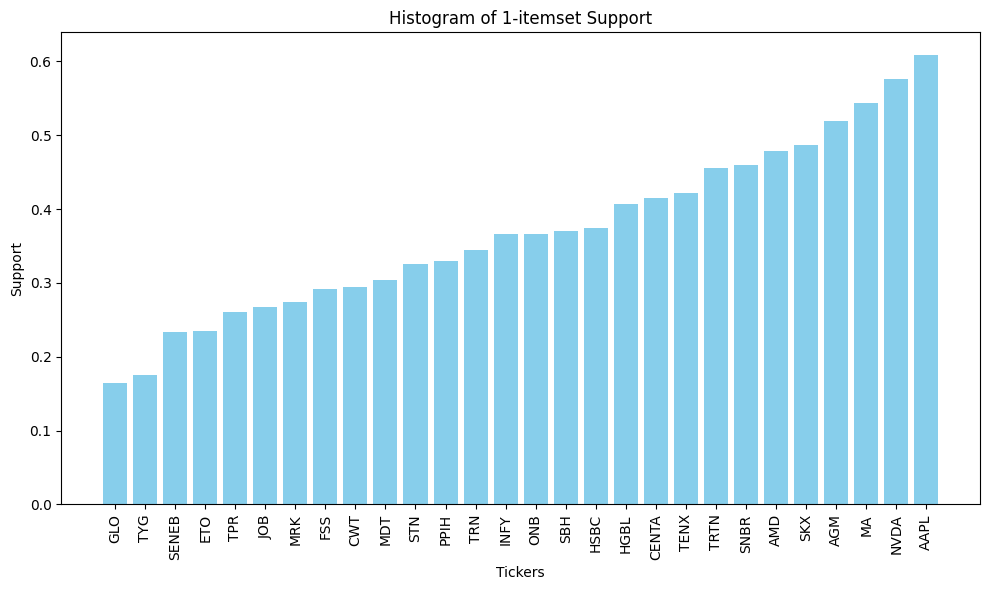

Threshold:  0.526776649746193


['MA', 'NVDA', 'AAPL']

In [66]:
ds_medium = get_dataset(TICKERS_MEDIUM)
dataset_medium = clean_data(ds_medium)
transactions_medium = get_transactions_table(dataset_medium, DATA_INTERVAL, TREND_THRESHOLD)
generate_histogram(TICKERS_MEDIUM, transactions_medium)
calculate_top_percentile(10, TICKERS_MEDIUM, transactions_medium)


# 4. Frequent Itemsets

## 4.1 Apriori unoptimized
Create and clearly document a function that calculates frequent itemsets using the "Apriori" algorithm without any optimization. The function, `apriori_unoptimized(minsup, transactions)` will take as inputs the transactions generated by function `get_transactions` and a minsup floating point value between 0 and 1, and generate a list of frequent items with basic statistics, as follows:

Found 27 1-frequent itemsets: { AMD }, { APPL }, { WST }, ... { FSC }

Found 345 2-frequent itemsets: { GLO, CWT }, { JOB, TYG }, ... { ELLO, NRG }

...

Found N M-frequent itemsets: ...


In [67]:
def apriori_unoptimized(minsup, transactions):
    """
    function documentation: The apriori_unoptimized function applies the Apriori algorithm to identify frequent itemsets within a given transaction dataset. Using the provided minimum support threshold (minsup) and transaction DataFrame, it repeatedly constructs candidate itemsets. These candidates are verified against the transaction data to determine their frequency. Unlike the optimized version, it exhaustively checks itemset combinations without initial pruning. The final result is a dictionary where frequent itemsets are grouped by their length
    This function implements the Apriori algorithm for frequent itemset mining with the given transaction table structure.

    Parameters:
    - minsup: Minimum support threshold (a float between 0 and 1).
    - transactions: A DataFrame where columns represent items (e.g., 'AMD', 'AAPL', etc.), and rows represent transactions.

    Returns:
    - frequent_itemsets: A dictionary where keys are frequent itemsets and values are their corresponding support counts.
    """
    header_row = transactions.columns.tolist()
    print(header_row)

    num_transactions = len(transactions)

    # Initialize frequent itemsets dictionary
    frequent_itemsets = {}
    return_itemsets = {}

    k = 1
    while True:
        # Generate candidate k-itemsets
        candidate_k_itemsets = {}
        if k == 1:
            # For the first iteration, we generate candidate 1-itemsets
            for item in transactions.columns:
                support = (transactions[item] == 1).sum() / num_transactions
                if support >= minsup:
                    candidate_k_itemsets[(item,)] = support
            # print("=============Candidate 1-itemsets ===============")
            # print(candidate_k_itemsets)
        else:
            # For subsequent iterations, generate candidate k-itemsets by joining frequent (k-1)-itemsets
            for itemset1 in frequent_itemsets.keys():
                for itemset2 in frequent_itemsets.keys():
                    if itemset1[:-1] == itemset2[:-1] and itemset1[-1] < itemset2[-1]:
                        new_itemset = itemset1 + (itemset2[-1],)
                        # Do not prune in the exhaustive mode

                        # Count support for candidate k-itemsets in transactions
                        support_count = 0
                        for transaction in transactions.index:
                            is_frequent = all(transactions.at[transaction, item] == 1 for item in new_itemset)
                            if is_frequent:
                                support_count += 1

                        candidate_k_itemsets[new_itemset] = support_count / num_transactions

        # Count support for candidate k-itemsets in transactions
        for transaction in transactions.index:
            for candidate_itemset in candidate_k_itemsets.keys():
                is_frequent = all(transactions.at[transaction, item] == 1 for item in candidate_itemset)
                if is_frequent:
                    candidate_k_itemsets[candidate_itemset] += 1

        # Prune candidate_k_itemsets to obtain frequent k-itemsets
        frequent_k_itemsets = {itemset: support / num_transactions for itemset, support in candidate_k_itemsets.items() if support / num_transactions >= minsup}
        print("Found {} {}-Itemsets:".format(len(frequent_k_itemsets), k), "  ", list(frequent_k_itemsets.keys()))
        return_itemsets[k] = list(frequent_k_itemsets.keys())
        # If no frequent k-itemsets were found, break the loop
        if not frequent_k_itemsets:
            break

        # Update frequent itemsets and increment k
        frequent_itemsets = frequent_k_itemsets
        k += 1

    # return list(frequent_itemsets.keys())
    return return_itemsets


## 4.2 Apriori Optimized
Create and clearly document a function that calculates frequent itemsets using the "Apriori" algorithm with optimization. The function, `apriori_optimized(minsup, transactions)` will take as inputs the transactions generated by function "get_transactions" and a minsup floating point value between 0 and 1, and generate a list of frequent items with basic statistics the same as "apriori_exhaustive". This function, however, must include at least one optimization from the list provided in the course slides

In [68]:

def apriori_optimized(minsup, transactions):
    """
    Function documentation: The apriori_optimized function implements the Apriori algorithm to find frequent itemsets from a transaction dataset. Given a minimum support threshold (minsup) and a DataFrame of transactions, it iteratively identifies frequent itemsets of increasing sizes. The function constructs candidates from previous frequent itemsets and prunes non-frequent ones based on support counts. The result is a dictionary of frequent itemsets grouped by their lengths.
    This function implements the Apriori algorithm for frequent itemset mining with the given transaction table structure.

    Parameters:
    - minsup: Minimum support threshold (a float between 0 and 1).
    - transactions: A DataFrame where columns represent items (e.g., 'AMD', 'AAPL', etc.), and rows represent transactions.

    Returns:
    - frequent_itemsets: A dictionary where keys are frequent itemsets and values are their corresponding support counts.
    """
    header_row = transactions.columns.tolist()
    print(header_row)

    num_transactions = len(transactions)

    # Initialize frequent itemsets dictionary
    frequent_itemsets = {}
    return_itemsets = {}

    k = 1
    while True:
        # Generate candidate k-itemsets
        candidate_k_itemsets = {}
        if k == 1:
            # For the first iteration, we generate candidate 1-itemsets
            for item in transactions.columns:
                support = (transactions[item] == 1).sum() / num_transactions
                if support >= minsup:
                    candidate_k_itemsets[(item,)] = support
            #print("=============Candidate 1-itemsets ===============")
            #print(candidate_k_itemsets)
        else:
            # For subsequent iterations, generate candidate k-itemsets by joining frequent (k-1)-itemsets
            for itemset1 in frequent_itemsets.keys():
                for itemset2 in frequent_itemsets.keys():
                    if itemset1[:-1] == itemset2[:-1] and itemset1[-1] < itemset2[-1]:
                        new_itemset = itemset1 + (itemset2[-1],)
                        # Prune by checking if all (k-1)-subsets are frequent
                        is_candidate = all(tuple(subset) in frequent_itemsets for subset in combinations(new_itemset, k - 1))
                        if is_candidate:
                            candidate_k_itemsets[new_itemset] = 0

        # Count support for candidate k-itemsets in transactions
        for transaction in transactions.index:
            for candidate_itemset in candidate_k_itemsets.keys():
                is_frequent = all(transactions.at[transaction, item] == 1 for item in candidate_itemset)
                if is_frequent:
                    candidate_k_itemsets[candidate_itemset] += 1

        # Prune candidate_k_itemsets to obtain frequent k-itemsets
        frequent_k_itemsets = {itemset: support / num_transactions for itemset, support in candidate_k_itemsets.items() if support / num_transactions >= minsup}
        print("Found {} {}-Itemsets:".format(len(frequent_k_itemsets),k), "  ", list(frequent_k_itemsets.keys()))
        return_itemsets[k] =  list(frequent_k_itemsets.keys())
        # If no frequent k-itemsets were found, break the loop
        if not frequent_k_itemsets:
            break

        # Update frequent itemsets and increment k
        frequent_itemsets = frequent_k_itemsets
        k += 1

    #return list(frequent_itemsets.keys())
    return return_itemsets

## 4.3 Runtime
Calculate the time it takes to run the `apriori_unoptimized` and `apriori_optimized` functions using the "TICKERS_MEDIUM" tickers list. Compare runtimes.

In [69]:
# Prepare data - MEDIUM
ds_medium = get_dataset(TICKERS_MEDIUM)
dataset_medium = clean_data(ds_medium)
transactions_medium = get_transactions_table(dataset_medium, DATA_INTERVAL, TREND_THRESHOLD)
# Minimum Support
MINSUP = 0.2

[*********************100%%**********************]  1 of 1 completed
Downloaded data for ticker: AMD with (3272, 6) entries
[*********************100%%**********************]  1 of 1 completed
Downloaded data for ticker: AAPL with (3272, 6) entries
[*********************100%%**********************]  1 of 1 completed
Downloaded data for ticker: MA with (3272, 6) entries
[*********************100%%**********************]  1 of 1 completed
Downloaded data for ticker: MRK with (3272, 6) entries
[*********************100%%**********************]  1 of 1 completed
Downloaded data for ticker: NVDA with (3272, 6) entries
[*********************100%%**********************]  1 of 1 completed
Downloaded data for ticker: PPIH with (3272, 6) entries
[*********************100%%**********************]  1 of 1 completed
Downloaded data for ticker: GLO with (3272, 6) entries
[*********************100%%**********************]  1 of 1 completed
Downloaded data for ticker: AGM with (3272, 6) entries
[*****

In [70]:
%time frequent_itemsets_medium = apriori_unoptimized(MINSUP, transactions_medium)

['AMD', 'AAPL', 'MA', 'MRK', 'NVDA', 'PPIH', 'GLO', 'AGM', 'HGBL', 'ETO', 'INFY', 'SNBR', 'CENTA', 'CWT', 'SKX', 'FSS', 'TPR', 'ONB', 'SBH', 'MDT', 'SENEB', 'HSBC', 'STN', 'JOB', 'TYG', 'TENX', 'TRN', 'CTHR']
Found 26 1-Itemsets:    [('AMD',), ('AAPL',), ('MA',), ('MRK',), ('NVDA',), ('PPIH',), ('AGM',), ('HGBL',), ('ETO',), ('INFY',), ('SNBR',), ('CENTA',), ('CWT',), ('SKX',), ('FSS',), ('TPR',), ('ONB',), ('SBH',), ('MDT',), ('SENEB',), ('HSBC',), ('STN',), ('JOB',), ('TYG',), ('TRN',), ('CTHR',)]
Found 89 2-Itemsets:    [('AMD', 'MA'), ('AMD', 'NVDA'), ('AMD', 'HGBL'), ('AMD', 'SNBR'), ('AMD', 'CENTA'), ('AMD', 'FSS'), ('AMD', 'MDT'), ('AMD', 'TRN'), ('AAPL', 'AMD'), ('AAPL', 'MA'), ('AAPL', 'NVDA'), ('AAPL', 'AGM'), ('AAPL', 'HGBL'), ('AAPL', 'INFY'), ('AAPL', 'SNBR'), ('AAPL', 'CENTA'), ('AAPL', 'SKX'), ('AAPL', 'FSS'), ('AAPL', 'SBH'), ('AAPL', 'MDT'), ('AAPL', 'STN'), ('AAPL', 'JOB'), ('AAPL', 'TRN'), ('AAPL', 'CTHR'), ('MA', 'NVDA'), ('MA', 'SNBR'), ('MA', 'SKX'), ('MA', 'SBH')

In [71]:
%time frequent_itemsets_medium_optimized = apriori_optimized(MINSUP, transactions_medium)

['AMD', 'AAPL', 'MA', 'MRK', 'NVDA', 'PPIH', 'GLO', 'AGM', 'HGBL', 'ETO', 'INFY', 'SNBR', 'CENTA', 'CWT', 'SKX', 'FSS', 'TPR', 'ONB', 'SBH', 'MDT', 'SENEB', 'HSBC', 'STN', 'JOB', 'TYG', 'TENX', 'TRN', 'CTHR']
Found 26 1-Itemsets:    [('AMD',), ('AAPL',), ('MA',), ('MRK',), ('NVDA',), ('PPIH',), ('AGM',), ('HGBL',), ('ETO',), ('INFY',), ('SNBR',), ('CENTA',), ('CWT',), ('SKX',), ('FSS',), ('TPR',), ('ONB',), ('SBH',), ('MDT',), ('SENEB',), ('HSBC',), ('STN',), ('JOB',), ('TYG',), ('TRN',), ('CTHR',)]
Found 89 2-Itemsets:    [('AMD', 'MA'), ('AMD', 'NVDA'), ('AMD', 'HGBL'), ('AMD', 'SNBR'), ('AMD', 'CENTA'), ('AMD', 'FSS'), ('AMD', 'MDT'), ('AMD', 'TRN'), ('AAPL', 'AMD'), ('AAPL', 'MA'), ('AAPL', 'NVDA'), ('AAPL', 'AGM'), ('AAPL', 'HGBL'), ('AAPL', 'INFY'), ('AAPL', 'SNBR'), ('AAPL', 'CENTA'), ('AAPL', 'SKX'), ('AAPL', 'FSS'), ('AAPL', 'SBH'), ('AAPL', 'MDT'), ('AAPL', 'STN'), ('AAPL', 'JOB'), ('AAPL', 'TRN'), ('AAPL', 'CTHR'), ('MA', 'NVDA'), ('MA', 'SNBR'), ('MA', 'SKX'), ('MA', 'SBH')

## 4.4 Rules
Create and clearly document a function that calculates rules. The function, `get_rules(tickers,transactions, frequent_itemsets, lift, interest)`, will generate a set of rules based on the frequent_itemsets, the minimum lift (a floating point value between 0 and 1) and minimum interest (a floating point value between 0 and infinite). The function will return the rules with some basic information, as follows:

Found 123 rules with 2 items: { AMD } > { FSC }, ...

...

Found N rules with M items: { GLO, ... } > { ELLO, ... }

In [72]:

def get_rules(tickers, transactions, frequent_itemsets, min_lift, min_interest):
    """
   function documentation:
    The get_rules() function generates association rules from frequent itemsets using a given transaction dataset. It first maps items to their indices for efficient lookup. The function then constructs potential rules by iterating through itemsets, breaking them into subsets, and calculates the confidence and lift for each rule. If these metrics meet specified thresholds, the rule is added to the results. Finally, the function groups and prints the discovered rules based on the total number of items in each rule
    Generate association rules based on frequent itemsets.

    Parameters:
    - tickers: A list of tickers or items.
    - transactions: The DataFrame containing the transaction data.
    - frequent_itemsets: A dictionary with frequent itemsets and their support counts.
    - lift: The lift threshold for filtering rules.
    - interest: The interest threshold for filtering rules.

    Returns:
    - rules: A list of association rules in the format "if A then B".
    """
    column_mapping_transaction_tickers = {col: idx for idx, col in enumerate(transactions.columns)}
    rules = []

    for itemset in frequent_itemsets:
        for idx in range(1, len(itemset)):
            for subset in combinations(itemset, idx):
                left = set(subset)
                left_index =  [column_mapping_transaction_tickers[col] for col in left]
                right = set(itemset) - left
                right_index = [column_mapping_transaction_tickers[col] for col in right]
                #print(left)
                #print(right)
                confidence = calculate_confidence(transactions, left_index, right_index)
                lift = calculate_lift(transactions, left_index, right_index)

                if lift >= min_lift and confidence >= min_interest:
                    #print("lift : ",lift, " interest: ",confidence )
                    rules.append((left, right))

    # Print the rules
    rule_counts = {}
    for left, right in rules:
        rule_length = len(left) + len(right)
        if rule_length not in rule_counts:
            rule_counts[rule_length] = []
        rule_counts[rule_length].append((left, right))

    for length, rule_list in rule_counts.items():
        print(f"Found {len(rule_list)} rules with {length} items:", end=" ")
        for i, (left, right) in enumerate(rule_list):
            print(f"{{ {' ,'.join(left)} }} > {{ {' ,'.join(right)} }}", end="")
            if i < len(rule_list) - 1:
                print(", ", end="")
        print()

    return rules

In [73]:
#temp_itemsets = [('AMD', 'MA', 'NVDA'), ('AMD', 'FSS', 'MA'), ('AAPL', 'AMD', 'MA'), ('AAPL', 'AMD', 'NVDA'), ('AAPL', 'MA', 'NVDA'), ('AAPL', 'MA', 'SNBR'), ('AAPL', 'MA', 'SKX'), ('AAPL', 'MA', 'MDT'), ('AAPL', 'NVDA', 'SNBR'), ('AAPL', 'NVDA', 'TRN'), ('AAPL', 'AGM', 'MA'), ('AAPL', 'AGM', 'NVDA'), ('AAPL', 'AGM', 'FSS'), ('AAPL', 'SKX', 'SNBR'), ('AAPL', 'FSS', 'MA'), ('AAPL', 'FSS', 'NVDA'), ('MA', 'NVDA', 'SNBR'), ('AGM', 'AMD', 'NVDA'), ('AGM', 'MA', 'NVDA'), ('AGM', 'MA', 'TRN'), ('AGM', 'FSS', 'MA'), ('AGM', 'FSS', 'STN'), ('AGM', 'FSS', 'TRN'), ('FSS', 'MA', 'NVDA'), ('FSS', 'MA', 'SKX'), ('FSS', 'MA', 'MDT'), ('FSS', 'MA', 'TRN')]

#rules = get_rules(TICKERS_MEDIUM, transactions_medium, temp_itemsets, 0.8, 0.3)
# Rules with Confidence >= 30%, and Lift >= 0.8
#rules = get_rules(TICKERS_MEDIUM, transactions_medium, frequent_itemsets_medium, 0.8, 0.3)

for idx,itemset in frequent_itemsets_medium.items():
  get_rules(TICKERS_MEDIUM, transactions_medium, itemset, 0.8, 0.3)


Found 178 rules with 2 items: { AMD } > { MA }, { MA } > { AMD }, { AMD } > { NVDA }, { NVDA } > { AMD }, { AMD } > { HGBL }, { HGBL } > { AMD }, { AMD } > { SNBR }, { SNBR } > { AMD }, { AMD } > { CENTA }, { CENTA } > { AMD }, { AMD } > { FSS }, { FSS } > { AMD }, { AMD } > { MDT }, { MDT } > { AMD }, { AMD } > { TRN }, { TRN } > { AMD }, { AAPL } > { AMD }, { AMD } > { AAPL }, { AAPL } > { MA }, { MA } > { AAPL }, { AAPL } > { NVDA }, { NVDA } > { AAPL }, { AAPL } > { AGM }, { AGM } > { AAPL }, { AAPL } > { HGBL }, { HGBL } > { AAPL }, { AAPL } > { INFY }, { INFY } > { AAPL }, { AAPL } > { SNBR }, { SNBR } > { AAPL }, { AAPL } > { CENTA }, { CENTA } > { AAPL }, { AAPL } > { SKX }, { SKX } > { AAPL }, { AAPL } > { FSS }, { FSS } > { AAPL }, { AAPL } > { SBH }, { SBH } > { AAPL }, { AAPL } > { MDT }, { MDT } > { AAPL }, { AAPL } > { STN }, { STN } > { AAPL }, { AAPL } > { JOB }, { JOB } > { AAPL }, { AAPL } > { TRN }, { TRN } > { AAPL }, { AAPL } > { CTHR }, { CTHR } > { AAPL }, { MA }